# Importing the libraries

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the space dataset

In [381]:
df=pd.read_csv('space_csv')
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


# discription about the dataset

# EDA 

In [382]:
#checking the shape
df.shape

(10000, 18)

In [383]:
#checking the columns in dataset
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [384]:
#Checking the info in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [385]:
#checking the types
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [386]:
#checking the null values
df.isnull().any()

objid        False
ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
rerun        False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool

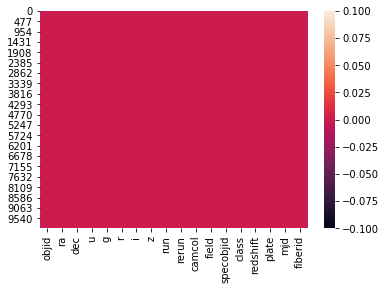

In [387]:
#using heatmap for visual representaion of null vaues
sns.heatmap(df.isnull())

In [388]:
#checking the values in dataset
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

# Data preprocessing

# for analysing our data target which is class we have to change it inot numeric type

In [389]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [390]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [391]:
#checking the types of class which has been converted from categorical to numerical
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class          int32
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [392]:
df['class'].unique()

array([2, 0, 1])

In [393]:
df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

# correlation

In [394]:
dfcor=df.corr()
dfcor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
#filling the null values
df=df.replace(np.NaN,df['rerun'].mean())
df=df.replace(np.NaN,df['redshift'].mean())
df=df.replace(np.NaN,df['run'].mean())


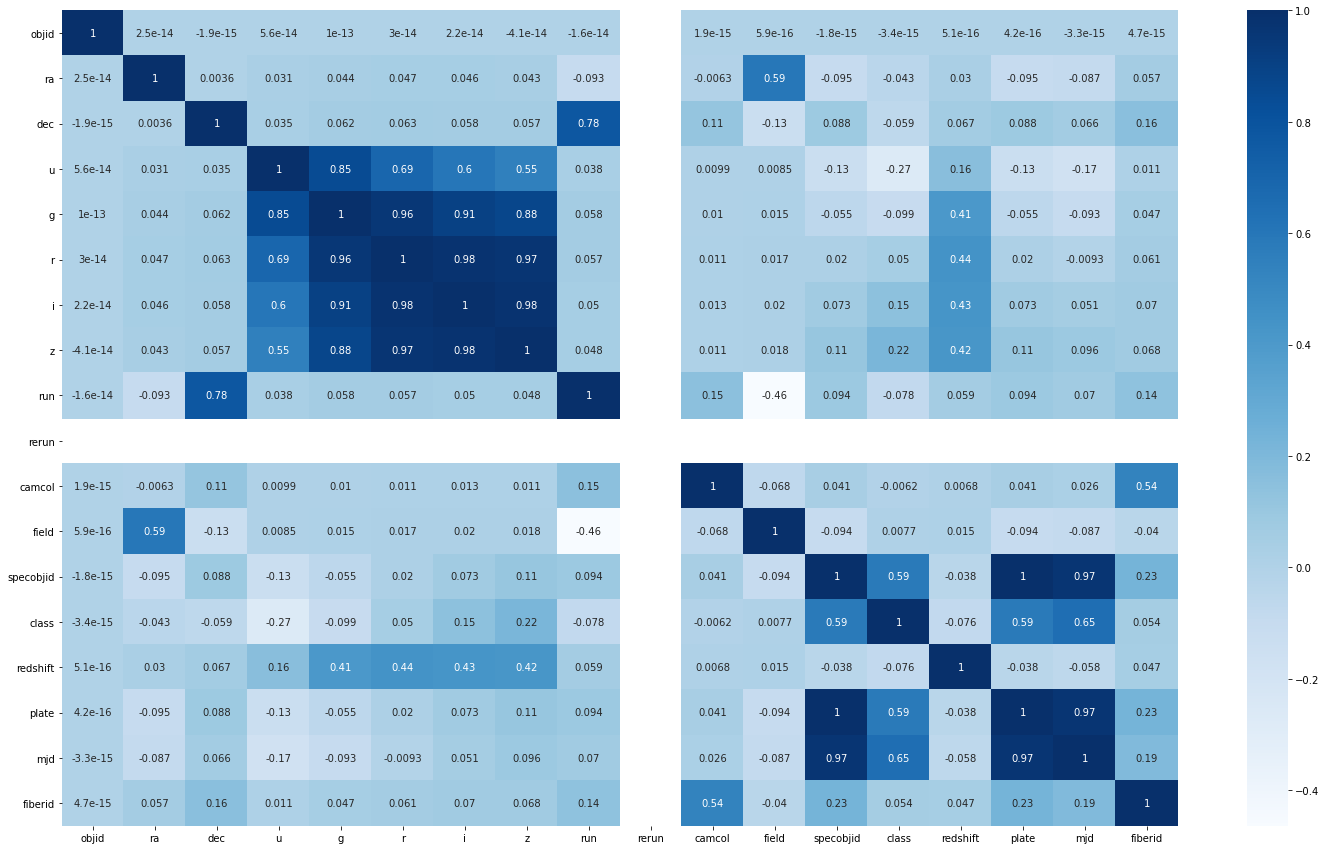

In [464]:
#plotting the heatmap for better underatanding of correlations
plt.figure(figsize=(25,15))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [465]:
#describing the data
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,5.520780,3.286182,2.649859,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.090652e+09,0.915400,0.283535,32.502240,230.071520,353.069400
std,1.577039e+05,0.705135,3.229667,0.040111,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,6.749411e+08,0.952856,0.321410,20.115448,3.260355,206.298149
min,1.237650e+18,2.019403,0.010626,2.350669,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,5.473372e+08,0.000000,0.000000,16.309506,227.107904,1.000000
25%,1.237650e+18,5.398936,0.639617,2.629354,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,5.821724e+08,0.000000,0.023097,17.349352,227.815715,186.750000
50%,1.237650e+18,5.650338,1.053455,2.661507,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,7.047397e+08,1.000000,0.251269,21.000000,228.028507,351.000000
75%,1.237650e+18,5.863078,7.245413,2.680483,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,1.697439e+09,2.000000,0.322541,50.586559,233.383804,510.000000
max,1.237650e+18,6.389733,8.279026,2.696195,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,3.077146e+09,2.000000,2.313840,91.706052,239.751955,1000.000000


#  Data Viualizations

our target is class
the clas is converted into numeric with uniquw values 0,1,2 which stands for galaxy, star and quasar object


# univariate analsyis

0    4998
2    4152
1     850
Name: class, dtype: int64

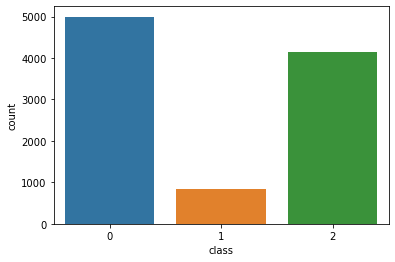

In [466]:
#using countplot for our target varaible class
sns.countplot(x='class', data=df)
df['class'].value_counts()

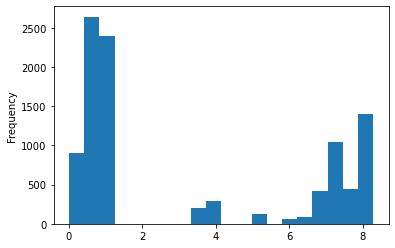

1.052816    151
0.611942    149
1.094065    149
0.546555    149
0.221112    149
           ... 
3.682220      1
0.696242      1
0.883736      1
7.942172      1
0.315408      1
Name: dec, Length: 6226, dtype: int64

In [467]:
df['dec'].plot.hist(bins=20)
plt.show()

df['dec'].value_counts()

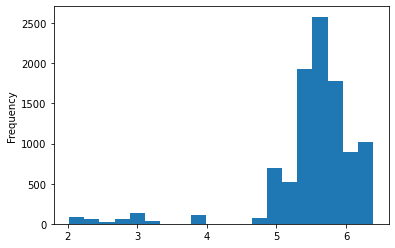

5.312044    1
6.148317    1
5.904730    1
6.037930    1
5.744851    1
           ..
5.580030    1
5.711191    1
5.874586    1
2.302277    1
5.500508    1
Name: ra, Length: 10000, dtype: int64

In [468]:
df['ra'].plot.hist(bins=20)
plt.show()

df['ra'].value_counts()

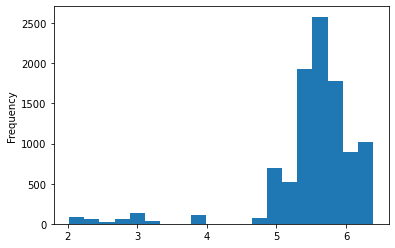

5.312044    1
6.148317    1
5.904730    1
6.037930    1
5.744851    1
           ..
5.580030    1
5.711191    1
5.874586    1
2.302277    1
5.500508    1
Name: ra, Length: 10000, dtype: int64

In [469]:
df['ra'].plot.hist(bins=20)
plt.show()

df['ra'].value_counts()

In [470]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class          int32
redshift     float64
plate        float64
mjd          float64
fiberid        int64
dtype: object

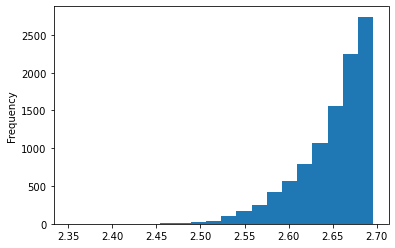

2.693219    3
2.691604    3
2.668260    3
2.667652    3
2.694525    3
           ..
2.654525    1
2.634397    1
2.594247    1
2.695772    1
2.576792    1
Name: u, Length: 9730, dtype: int64

In [471]:
df['u'].plot.hist(bins=20)
plt.show()

df['u'].value_counts()

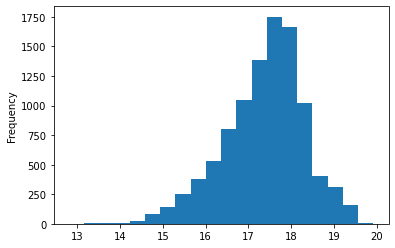

17.55623    3
17.75478    3
17.60766    3
18.31910    3
17.53612    2
           ..
16.79101    1
18.01411    1
16.93613    1
17.68695    1
17.87934    1
Name: g, Length: 9817, dtype: int64

In [472]:
df['g'].plot.hist(bins=20)
plt.show()

df['g'].value_counts()

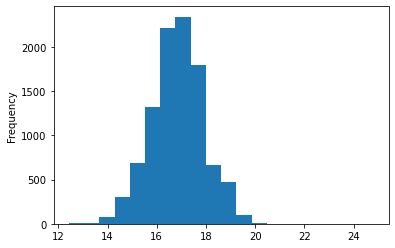

15.99986    3
16.48978    3
16.70929    2
17.21182    2
16.27899    2
           ..
19.18255    1
16.03177    1
16.27091    1
17.45321    1
17.05181    1
Name: r, Length: 9852, dtype: int64

In [473]:
df['r'].plot.hist(bins=20)
plt.show()

df['r'].value_counts()

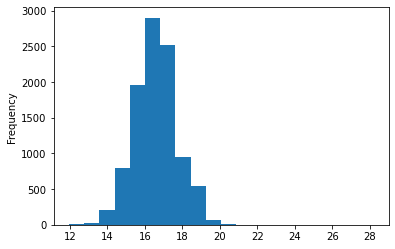

18.77594    2
16.70494    2
16.91346    2
15.61870    2
17.19571    2
           ..
15.41105    1
16.61259    1
16.52959    1
15.61332    1
17.93967    1
Name: i, Length: 9890, dtype: int64

In [474]:
df['i'].plot.hist(bins=20)
plt.show()

df['i'].value_counts()

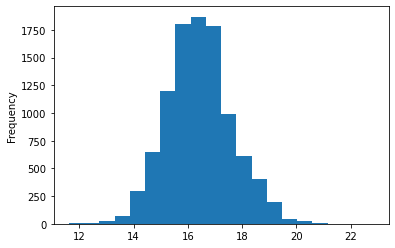

17.18764    2
17.15916    2
16.57886    2
17.30935    2
16.42915    2
           ..
16.58965    1
13.45055    1
16.96533    1
17.53121    1
17.83702    1
Name: z, Length: 9896, dtype: int64

In [475]:
df['z'].plot.hist(bins=20)
plt.show()

df['z'].value_counts()

# bivariate analysis

with target class

756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64

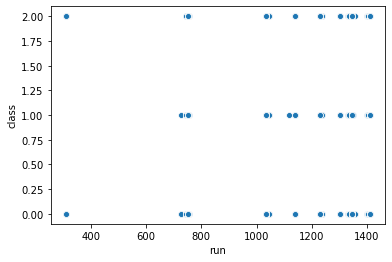

In [476]:
sns.scatterplot(x='run',y='class', data=df)
df['run'].value_counts()

In [477]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class          int32
redshift     float64
plate        float64
mjd          float64
fiberid        int64
dtype: object

301    10000
Name: rerun, dtype: int64

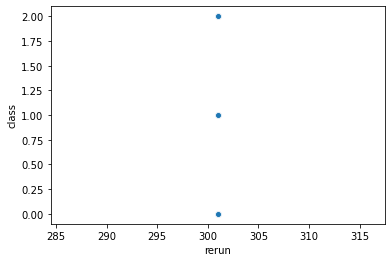

In [478]:
sns.scatterplot(x='rerun',y='class', data=df)
df['rerun'].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

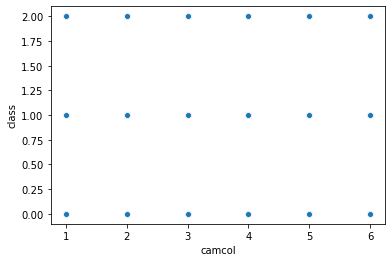

In [479]:
sns.scatterplot(x='camcol',y='class', data=df)
df['camcol'].value_counts()

301    62
302    58
304    56
305    55
309    54
       ..
499     1
676     1
507     1
660     1
503     1
Name: field, Length: 703, dtype: int64

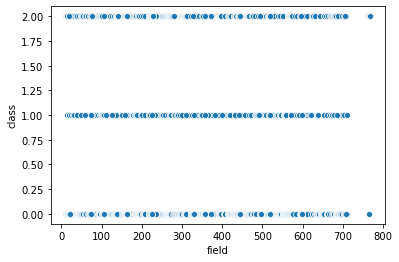

In [480]:
sns.scatterplot(x='field',y='class', data=df)
df['field'].value_counts()

1.929308e+09    18
1.697430e+09    18
1.697416e+09    18
1.795107e+09    17
1.697092e+09    17
                ..
5.625469e+08     1
5.484004e+08     1
8.341667e+08     1
6.949928e+08     1
8.328919e+08     1
Name: specobjid, Length: 6349, dtype: int64

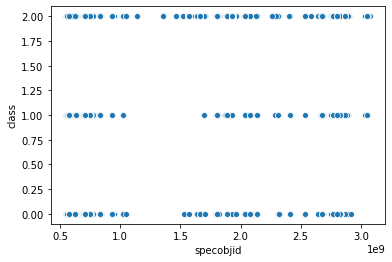

In [481]:
sns.scatterplot(x='specobjid',y='class', data=df)
df['specobjid'].value_counts()

0.000000    25
0.005235    15
0.321654    12
0.386231    11
0.075252    11
            ..
0.296554     1
0.356326     1
0.279244     1
1.286426     1
0.270291     1
Name: redshift, Length: 7902, dtype: int64

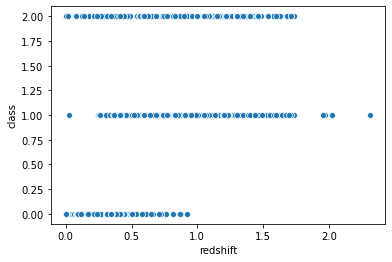

In [482]:
sns.scatterplot(x='redshift',y='class', data=df)
df['redshift'].value_counts()

50.576674    222
50.586559    221
53.805204    166
16.613248    156
86.348133    139
            ... 
68.934752      1
85.492690      1
85.305334      1
82.413591      1
23.173260      1
Name: plate, Length: 487, dtype: int64

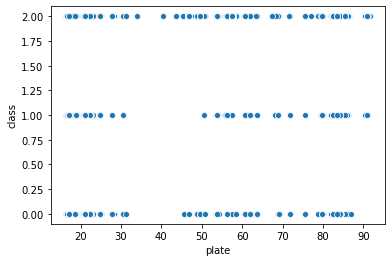

In [483]:
sns.scatterplot(x='plate',y='class', data=df)
df['plate'].value_counts()

228.035085    312
227.835467    222
232.680038    222
232.826115    221
227.833272    214
             ... 
238.325408      1
238.031511      1
235.908881      1
228.094279      1
239.585058      1
Name: mjd, Length: 355, dtype: int64

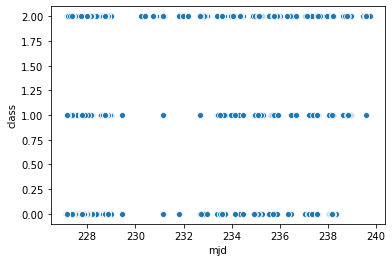

In [484]:
sns.scatterplot(x='mjd',y='class', data=df)
df['mjd'].value_counts()

155    29
138    28
454    27
249    26
11     26
       ..
866     1
858     1
850     1
842     1
915     1
Name: fiberid, Length: 892, dtype: int64

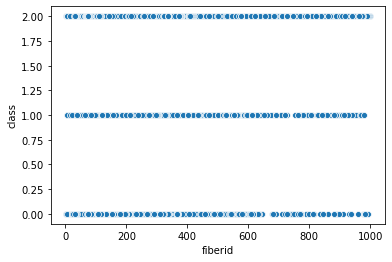

In [485]:
sns.scatterplot(x='fiberid',y='class', data=df)
df['fiberid'].value_counts()

# plotting outliers

In [486]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class          int32
redshift     float64
plate        float64
mjd          float64
fiberid        int64
dtype: object

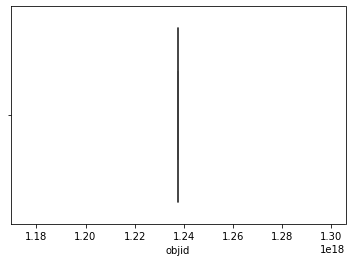

In [487]:
sns.boxplot(df['objid'])

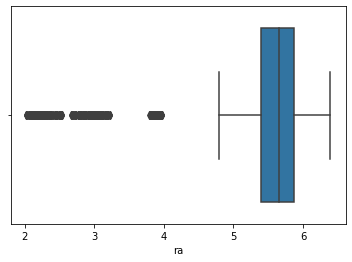

In [488]:
sns.boxplot(df['ra'])

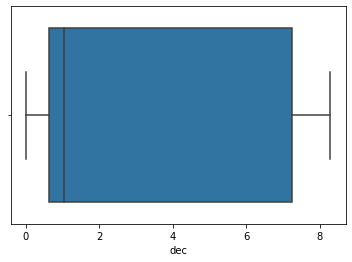

In [489]:
sns.boxplot(df['dec'])

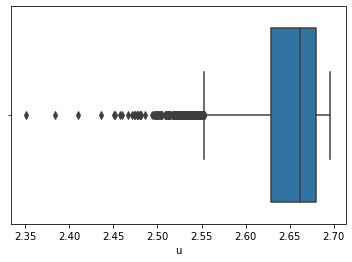

In [490]:
sns.boxplot(df['u'])

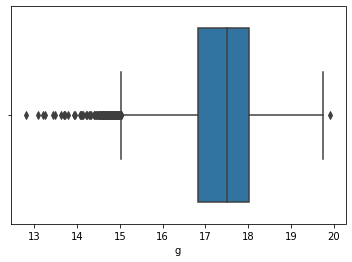

In [491]:
sns.boxplot(df['g'])

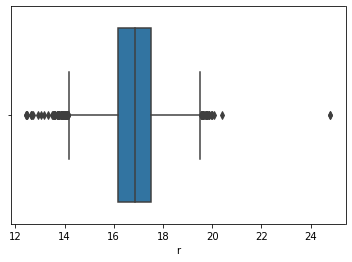

In [492]:
sns.boxplot(df['r'])

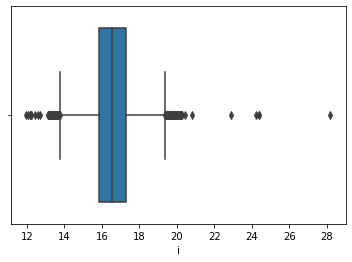

In [493]:
sns.boxplot(df['i'])

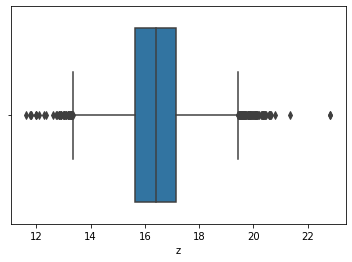

In [494]:
sns.boxplot(df['z'])

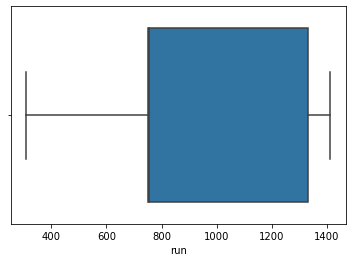

In [495]:
sns.boxplot(df['run'])

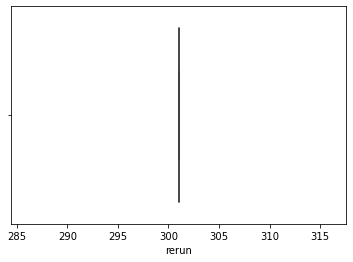

In [496]:
sns.boxplot(df['rerun'])

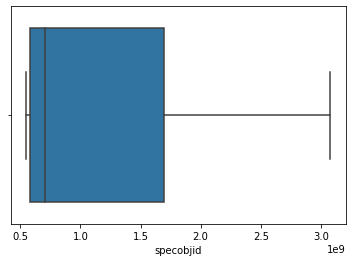

In [497]:
sns.boxplot(df['specobjid'])

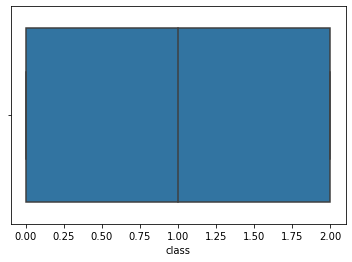

In [498]:
sns.boxplot(df['class'])

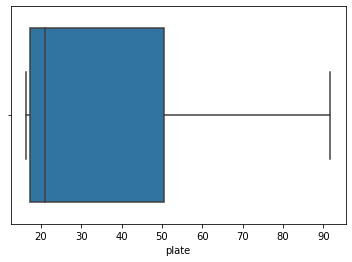

In [499]:
sns.boxplot(df['plate'])

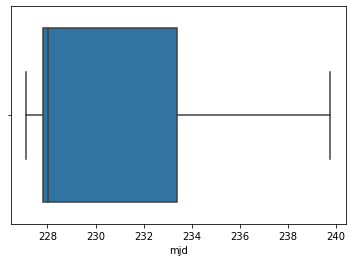

In [500]:
sns.boxplot(df['mjd'])

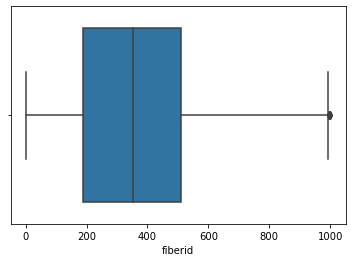

In [501]:
sns.boxplot(df['fiberid'])

# skewness

In [502]:
from scipy.stats import skew

In [503]:
df.skew()

objid        1.000150
ra          -2.773755
dec          0.534794
u           -1.315798
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.093905
class        0.169292
redshift     2.208036
plate        1.093870
mjd          1.025184
fiberid      0.308053
dtype: float64

In [504]:
#treating skewness via Square root method and cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.65:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.65:
            df[col]=np.cbrt(df[col])

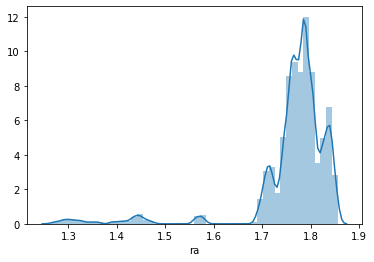

In [505]:
#plotting skewness
sns.distplot(df['ra'])
plt.show()

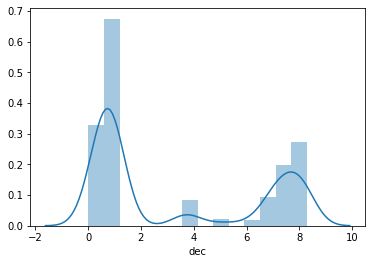

In [506]:
sns.distplot(df['dec'])
plt.show()

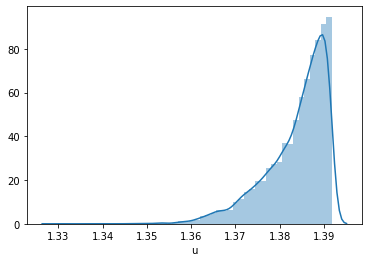

In [507]:
sns.distplot(df['u'])
plt.show()

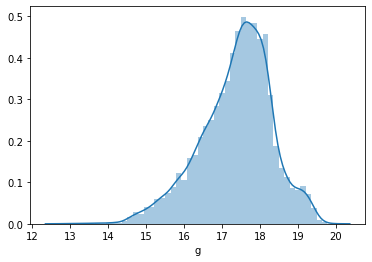

In [508]:
sns.distplot(df['g'])
plt.show()

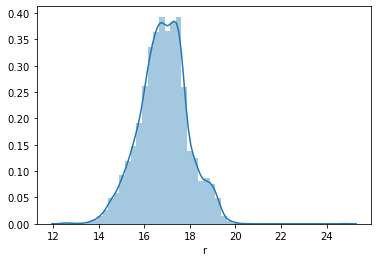

In [509]:
sns.distplot(df['r'])
plt.show()

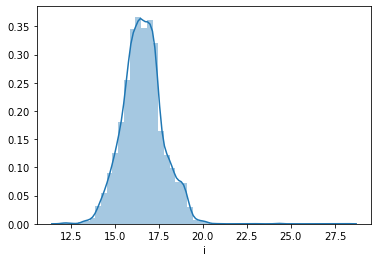

In [510]:
sns.distplot(df['i'])
plt.show()

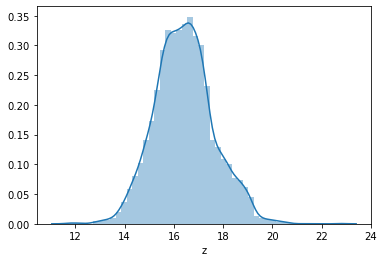

In [511]:
sns.distplot(df['z'])
plt.show()

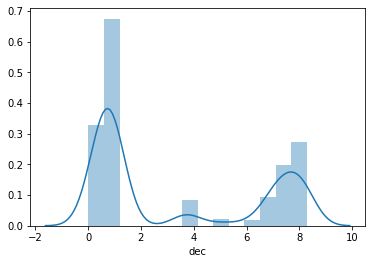

In [512]:
sns.distplot(df['dec'])
plt.show()

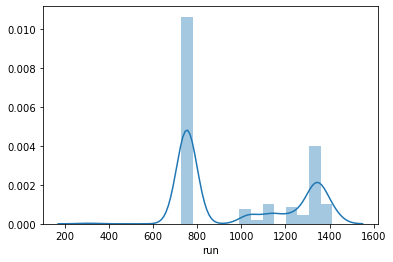

In [513]:
sns.distplot(df['run'])
plt.show()

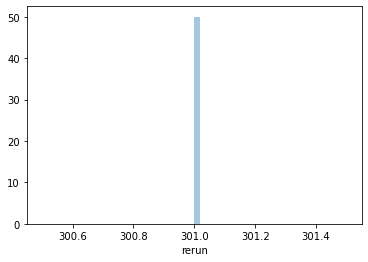

In [514]:
sns.distplot(df['rerun'])
plt.show()

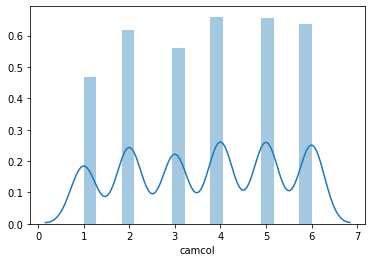

In [515]:
sns.distplot(df['camcol'])
plt.show()

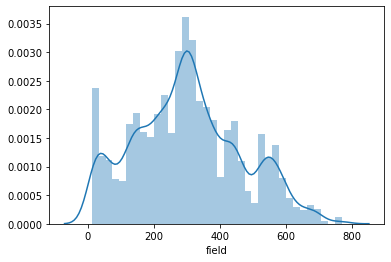

In [516]:
sns.distplot(df['field'])
plt.show()

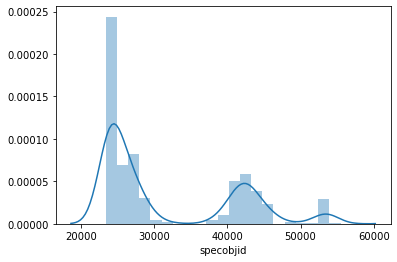

In [517]:
sns.distplot(df['specobjid'])
plt.show()

In [518]:
df.skew()

objid        1.000150
ra          -3.366183
dec          0.534794
u           -1.350023
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    0.863299
class        0.169292
redshift     0.623407
plate        0.863260
mjd          1.018098
fiberid      0.308053
dtype: float64

# removing outliers

In [595]:
#using z-score method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

# preparing dataset for model building

In [596]:
#seperating independent and target variable
x=df.drop('class', axis=1)
y=df['class'] #target variable

In [597]:
#scaling in input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [598]:
x

array([[ 0.        ,  0.23974423, -0.92481452, ...,  1.30419536,
         1.31584329,  0.66863177],
       [ 0.        ,  0.24055645, -0.90365859, ..., -0.75472654,
        -0.88647407,  0.91101156],
       [ 0.        ,  0.24154752, -0.9075557 , ..., -0.83072496,
        -0.60914088,  0.77527888],
       ...,
       [ 0.        , -0.48719728,  1.2081704 , ...,  2.32744329,
         2.65750259,  1.3036668 ],
       [ 0.        , -0.48842606,  1.21002374, ..., -0.53381835,
        -0.70819462, -0.60143828],
       [ 0.        , -0.48536616,  1.21114772, ..., -0.53381835,
        -0.70819462, -0.5820479 ]])

In [599]:
#filling the null values
df.fillna(method='ffill', inplace=True)


In [600]:
df.isnull().any()

objid        False
ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
rerun        False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool

In [601]:
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [602]:
#checking the shape of independent and target varaible
x.shape

(10000, 17)

In [603]:
y.shape

(10000,)

# scaling


In [604]:
#scaling the dataset using Standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

# Spliting the dataset 

In [605]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# finding the best model

In [606]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [608]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9476
[[1209    2   35]
 [  11  222    9]
 [  62   12  938]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1246
           1       0.94      0.92      0.93       242
           2       0.96      0.93      0.94      1012

    accuracy                           0.95      2500
   macro avg       0.95      0.94      0.94      2500
weighted avg       0.95      0.95      0.95      2500



In [609]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.932
[[1214    0   32]
 [  15  222    5]
 [ 106   12  894]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1246
           1       0.95      0.92      0.93       242
           2       0.96      0.88      0.92      1012

    accuracy                           0.93      2500
   macro avg       0.94      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500



In [610]:
#k=10
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9336
[[1208    2   36]
 [  15  214   13]
 [  82   18  912]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1246
           1       0.91      0.88      0.90       242
           2       0.95      0.90      0.92      1012

    accuracy                           0.93      2500
   macro avg       0.93      0.92      0.92      2500
weighted avg       0.93      0.93      0.93      2500



In [611]:
#using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)
forest.score(x_train, y_train)
predforest=forest.predict(x_test)
print(accuracy_score(y_test,predforest))
print(confusion_matrix(y_test,predforest))
print(classification_report(y_test,predforest))

0.9584
[[1218    0   28]
 [  10  222   10]
 [  46   10  956]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1246
           1       0.96      0.92      0.94       242
           2       0.96      0.94      0.95      1012

    accuracy                           0.96      2500
   macro avg       0.96      0.95      0.95      2500
weighted avg       0.96      0.96      0.96      2500



# Cross validation score

In [614]:
pred_forest=forest.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_forest)
for j in range (2,10):
    lssscore = cross_val_score(forest, x,y,cv=j)
    lsc = lssscore.mean()
    print('At cv:',j)
    print('cross_val_score is:',lsc*100)
    print('accuracy_score is:',lss*100)
    print('\n')


At cv: 2
cross_val_score is: 94.85
accuracy_score is: 95.84


At cv: 3
cross_val_score is: 94.9999199080076
accuracy_score is: 95.84


At cv: 4
cross_val_score is: 95.21
accuracy_score is: 95.84


At cv: 5
cross_val_score is: 95.7
accuracy_score is: 95.84


At cv: 6
cross_val_score is: 95.48995362992227
accuracy_score is: 95.84


At cv: 7
cross_val_score is: 95.33991343213283
accuracy_score is: 95.84


At cv: 8
cross_val_score is: 95.51
accuracy_score is: 95.84


At cv: 9
cross_val_score is: 95.40990070230045
accuracy_score is: 95.84




In [615]:
lsscore_selected = cross_val_score(forest,x,y,cv=4).mean()
print('the cv score is:',lsscore_selected,'\n the accuracy score is:',lss)

the cv score is: 0.9521 
 the accuracy score is: 0.9584


In [624]:
#saving the model
import pickle
filename = 'modek.pkl'
pickle.dump(forest, open(filename, 'wb'))